# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
X_train = pd.read_csv('./input/X_train.csv')
X_train.head(3)

,Order,Subject,"('tBodyAcc-mean()-X',)","('tBodyAcc-mean()-Y',)","('tBodyAcc-mean()-Z',)","('tBodyAcc-std()-X',)","('tBodyAcc-std()-Y',)","('tBodyAcc-std()-Z',)","('tBodyAcc-mad()-X',)","('tBodyAcc-mad()-Y',)",...,"('fBodyBodyGyroJerkMag-meanFreq()',)","('fBodyBodyGyroJerkMag-skewness()',)","('fBodyBodyGyroJerkMag-kurtosis()',)","('angle(tBodyAccMean,gravity)',)","('angle(tBodyAccJerkMean),gravityMean)',)","('angle(tBodyGyroMean,gravityMean)',)","('angle(tBodyGyroJerkMean,gravityMean)',)","('angle(X,gravityMean)',)","('angle(Y,gravityMean)',)","('angle(Z,gravityMean)',)"
0,1,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,2,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,3,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


In [3]:
X_test = pd.read_csv('./input/X_test.csv')
X_test.head(3)

,Order,Subject,"('tBodyAcc-mean()-X',)","('tBodyAcc-mean()-Y',)","('tBodyAcc-mean()-Z',)","('tBodyAcc-std()-X',)","('tBodyAcc-std()-Y',)","('tBodyAcc-std()-Z',)","('tBodyAcc-mad()-X',)","('tBodyAcc-mad()-Y',)",...,"('fBodyBodyGyroJerkMag-meanFreq()',)","('fBodyBodyGyroJerkMag-skewness()',)","('fBodyBodyGyroJerkMag-kurtosis()',)","('angle(tBodyAccMean,gravity)',)","('angle(tBodyAccJerkMean),gravityMean)',)","('angle(tBodyGyroMean,gravityMean)',)","('angle(tBodyGyroJerkMean,gravityMean)',)","('angle(X,gravityMean)',)","('angle(Y,gravityMean)',)","('angle(Z,gravityMean)',)"
0,1,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,3,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346


In [4]:
y_train = pd.read_csv('./input/y_train.txt', header=None)
y_train.head(3)

,0
0,5
1,5
2,5


In [5]:
y_test = pd.read_csv('./input/y_test.txt', header=None)
y_test.head(3)

,0
0,5
1,5
2,5


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [7]:
%%time
árvore = DecisionTreeClassifier(random_state=2360873, max_depth=4).fit(X_train, y_train)
importancias = árvore.feature_importances_
indices_importantes = np.argsort(importancias)[::-1][:3]
print('As 3 variáveis com maior importância: ')
for indice in indices_importantes:
    nome_variavel = X_train.columns[indice]
    print(f" {indice} - {nome_variavel} : {importancias[indice]:.4f}")

As 3 variáveis com maior importância: 
 42 - ('tGravityAcc-mean()-X',) : 0.2803
 267 - ('fBodyAcc-mean()-X',) : 0.2534
 561 - ('angle(Y,gravityMean)',) : 0.1722
CPU times: total: 844 ms
Wall time: 1.01 s


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [8]:
%%time
X_train_top3 = X_train.iloc[:, indices_importantes]
X_valid_top3 = X_valid.iloc[:, indices_importantes]
árvore = DecisionTreeClassifier(random_state=2360873).fit(X_train_top3, y_train)
caminho = árvore.cost_complexity_pruning_path(X_train_top3, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: total: 0 ns
Wall time: 37.9 ms


In [9]:
ccp_alphas

array([0.00000000e+00, 1.20904365e-04, 1.20904365e-04, 1.20904365e-04,
       1.36017410e-04, 1.36017410e-04, 1.45085238e-04, 1.45085238e-04,
       1.45085238e-04, 1.45085238e-04, 1.45085238e-04, 1.51130456e-04,
       1.52721303e-04, 1.53455540e-04, 1.55448469e-04, 1.55448469e-04,
       1.57175674e-04, 1.58105708e-04, 1.58686979e-04, 1.58686979e-04,
       1.58686979e-04, 1.58686979e-04, 1.61205820e-04, 1.61205820e-04,
       1.61205820e-04, 1.61205820e-04, 1.63220892e-04, 1.63220892e-04,
       1.63220892e-04, 1.63220892e-04, 1.64869588e-04, 1.66243501e-04,
       1.66243501e-04, 1.66243501e-04, 1.66243501e-04, 1.67754806e-04,
       1.69266111e-04, 1.70021763e-04, 1.70021763e-04, 1.70688515e-04,
       1.70993316e-04, 1.71281183e-04, 1.71281183e-04, 1.71811466e-04,
       1.71811466e-04, 1.72056211e-04, 1.72720521e-04, 1.73435227e-04,
       1.73471480e-04, 1.73471480e-04, 1.73471480e-04, 1.74102285e-04,
       1.75311329e-04, 1.75689155e-04, 1.75689155e-04, 1.76174931e-04,
      

In [10]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train_top3, y_train)
    clfs.append(clf)

In [11]:
train_scores = [clf.score(X_train_top3, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid_top3, y_valid) for clf in clfs]

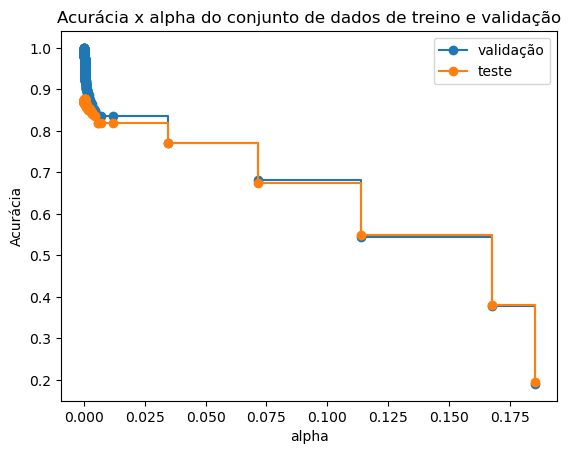

In [12]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [13]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 87.65


DecisionTreeClassifier(ccp_alpha=0.00027592103217783303, random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia da melhor árvore na base de testes: 70.34


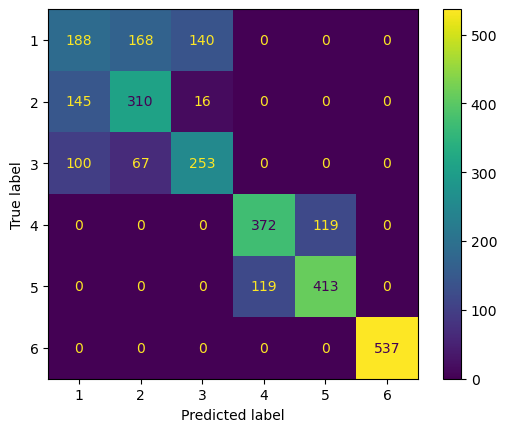

In [14]:
X_test_top3 = X_test.iloc[:, indices_importantes]
acuracia_teste = melhor_arvore.score(X_test_top3, y_test)

print(f'Acurácia da melhor árvore na base de testes: {acuracia_teste*100:.2f}')

ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test_top3, y_test)